In [1]:
import scvi
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context

Global seed set to 0
/home/chutianhao/.conda/envs/scvi-env/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/home/chutianhao/.conda/envs/scvi-env/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
sc.settings.verbosity = 3
sc.set_figure_params(dpi=150, frameon=True, color_map='viridis_r', dpi_save=600)
palette_d = ['#378C4F', '#7BBC5E', '#E2A7CC', '#D9579B', '#6DB6FFFF','#A59ACB', '#006DDBFF',  '#7464AA', '#B6DBFFFF', '#F5CDCD', '#924900FF'] # user defined discrete colors

In [3]:
adata = sc.read_h5ad("sc_mice_new.h5ad")

In [4]:
adata.X.dtype

dtype('float32')

In [6]:
print(adata.X)

  (1258, 0)	2.0
  (1415, 0)	1.0
  (1559, 0)	1.0
  (2061, 0)	2.0
  (2122, 0)	1.0
  (2139, 0)	1.0
  (2325, 0)	8.0
  (2552, 0)	1.0
  (2557, 0)	1.0
  (2888, 0)	1.0
  (3166, 0)	4.0
  (3176, 0)	1.0
  (3537, 0)	1.0
  (3759, 0)	10.0
  (3902, 0)	1.0
  (4127, 0)	2.0
  (4216, 0)	1.0
  (4425, 0)	4.0
  (4531, 0)	3.0
  (4634, 0)	2.0
  (5114, 0)	3.0
  (5189, 0)	2.0
  (5310, 0)	1.0
  (5434, 0)	4.0
  (5474, 0)	1.0
  :	:
  (58873, 16169)	1.0
  (57373, 16170)	1.0
  (57689, 16170)	1.0
  (57740, 16170)	1.0
  (57786, 16170)	1.0
  (57978, 16170)	1.0
  (58037, 16170)	1.0
  (58767, 16170)	1.0
  (58831, 16170)	1.0
  (57143, 16171)	4.0
  (57192, 16171)	2.0
  (57311, 16171)	4.0
  (57416, 16171)	4.0
  (57471, 16171)	2.0
  (57541, 16171)	4.0
  (58300, 16171)	3.0
  (58341, 16171)	2.0
  (58380, 16171)	6.0
  (58495, 16171)	2.0
  (58514, 16171)	2.0
  (58564, 16171)	8.0
  (58576, 16171)	5.0
  (58742, 16171)	1.0
  (58789, 16171)	1.0
  (58842, 16171)	1.0


In [5]:
adata.layers['counts'] = adata.X.copy() # preserve counts

In [7]:
# log transformation of the data
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata # freeze the process, and store the normalized counts

normalizing counts per cell
    finished (0:00:00)


In [8]:
sc.pp.neighbors(adata, use_rep='X_harmony')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:13)


In [18]:
sc.tl.umap(adata, min_dist=0.4)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:20)


In [13]:
sc.tl.leiden(adata, resolution=1.0, key_added='sc_leiden')

running Leiden clustering
    finished: found 32 clusters and added
    'sc_leiden', the cluster labels (adata.obs, categorical) (0:00:05)


In [16]:
sc.tl.rank_genes_groups(adata, 'sc_leiden', method='wilcoxon')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:56)


/home/chutianhao/.conda/envs/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/chutianhao/.conda/envs/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/chutianhao/.conda/envs/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:399:

In [17]:
pd.set_option('display.max_columns', None)
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,Apoa2,Srgn,Ctsb,Ftl1,Lyz2,Fga,Cd3d,Igfbp7,Il2rb,Cd79a,Cd3d,Ifitm6,Hmgn2,Aldob,Il7r,Prtn3,H2-Aa,Ly6c1,Mki67,Atf5,Cst3,Siglech,Stmn1,Ahsg,Bgn,Trf,Gata2,Bex1,Jchain,Cebpb,Clec4f,Ptma
1,Alb,Mxd1,C1qa,C1qb,Ms4a6c,Cps1,Cd3g,Gpihbp1,Klrk1,Ebf1,Ccl5,Lcn2,Camp,Ass1,Cd3g,Cmtm7,Cd74,Fabp4,Pclaf,Kyat3,Naaa,Irf8,Tubb5,Aqp4,Dcn,Afp,Cyp11a1,Afp,Mzb1,Lst1,Csf1r,Hmgb1
2,Ttr,S100a11,C1qc,C1qc,Plac8,Gc,Rps15a,Ptprb,Klrb1c,Cd74,Cd3g,S100a9,Cebpe,Ttc36,Cd3d,Ptma,H2-Eb1,Sparc,Tubb5,Reep6,H2-Ab1,Tcf4,Hmgb2,Nnmt,Igfbp7,Slc25a4,Ms4a2,Sdc4,Xbp1,Msrb1,Maf,Vpreb3
3,Rbp4,Mcl1,Apoe,C1qa,S100a4,Apob,Nkg7,Egfl7,Nkg7,H2-Aa,Tmsb10,Anxa1,Hmgb2,Fabp1,Tpt1,Ramp1,H2-Ab1,Col4a1,Stmn1,Dhcr24,Plbd1,Ccr9,Top2a,Cdo1,Ecm1,Igf2,Mcpt8,Krt18,Txndc5,Csf3r,Vsig4,Pclaf
4,Apoa1,Msrb1,Lgmn,Ctsb,Ifitm3,Alb,Ccl5,Eng,Ccl5,H2-Eb1,Ms4a4b,S100a8,Serpinb1a,Dbi,Rps27,Mpo,Lsp1,Timp3,Tuba1b,Gpt2,H2-Eb1,Rnase6,Pclaf,Pigr,Cxcl12,Apoa1,Hdc,Gnas,Edem1,Plac8,Cd5l,Tubb5
5,Apoc1,Il1r2,C1qb,Fth1,Ms4a4c,Ahsg,Cd8b1,Kdr,Klre1,H2-Ab1,Il2rb,Wfdc21,Fcnb,Atp5g1,Cd3e,Myb,Cst3,Flt1,Hmgb2,Sardh,Ifi205,Bst2,Mki67,Inmt,Prelp,Mt1,Cpa3,Krt8,Sec11c,Il1b,Aqp1,Ezh2
6,Ahsg,Cebpb,Grn,Apoe,Ccr2,Fgb,Rpl13a,Plpp3,Ctsw,Cd79b,Rplp2,Pglyrp1,Ngp,Ppia,Tmsb10,Ctsg,H2-DMa,Pecam1,Top2a,Cyp2c68,Wdfy4,Dnajc7,Hmgb1,Prodh,Sod3,Bex1,Fcer1a,Apoc2,Hsp90b1,Snx20,Sdc3,Uhrf1
7,Fgb,Csf3r,Ctss,Ctsd,Cebpb,Vtn,Ms4a4b,Aqp1,Xcl1,Ly6d,Bcl2,Ngp,Chil3,Mif,Rpl13a,Plac8,S100a4,Cdh5,Ptma,Etnk2,H2-Aa,Pld4,Ptma,Fetub,Col14a1,Serpina1b,Ier3,Atp5e,Sec61b,Cxcr2,Ehd3,Ebf1
8,Apoc2,Hdc,Psap,Itm2b,Ctss,C3,Rps27,Id3,Klrd1,Ms4a1,Rps15a,Cd177,Arhgdib,Chchd10,Lat,Cdk6,Cbfa2t3,Ly6a,Dek,Nat8f2,Irf8,Rpl31,Tuba1b,Comt,Colec11,Ahsg,Ccl3,Trf,Pdia4,Mxd1,Dnase1l3,Stmn1
9,Fgg,Tyrobp,Mafb,Psap,Zeb2,Apoa2,Cd3e,Ehd3,Txk,Mef2c,Gimap3,Adpgk,Wfdc21,Cyb5a,Ltb,Stmn1,H2-DMb1,Cd200,Hist1h2ap,Hpn,Ppt1,Lair1,Cks1b,Pah,Sparc,Psat1,Srgn,Tceal9,Ssr4,Slfn1,Igfbp7,Pou2af1


In [15]:
# Annotation
adata.obs['annotation'] = (
    adata.obs["sc_leiden"]
    .map(lambda x: {"0": "Hepatocytes", "1": "Granulocytes", "2": "Mono/macro", "3": "Mono/macro", "4": "Mono/macro", "5": "Hepatocytes", "6": "T cells", "7": "Endothelial cells", "8": "NK cells", "9": "B cells", "10": "T cells", "11": "Granulocytes", "12": "Cycling cells", "13": "Hepatocytes", "14": "T cells", "15": "Granulocytes", "16": "Mono/macro", "17": "Endothelial cells", "18": "Monocyte-linage", "19": "Hepatocytes", "20": "Monocyte-linage", "21": "Monocyte-linage", "22": "Monocyte-linage", "23": "Cycling cells", "24": "Granulocytes", "25": "Hepatocytes", "26": "Hepatocytes", "27": "Plasma cells", "28": "Hepatocytes", "29": "Endothelial cells", "30": "Monocyte-linage", "31": "CAF", "32": "Granulocytes"}.get(x, x))
    .astype("category")
)

In [16]:
adata = adata[adata.obs['RNA_snn_res.1'] != '31']

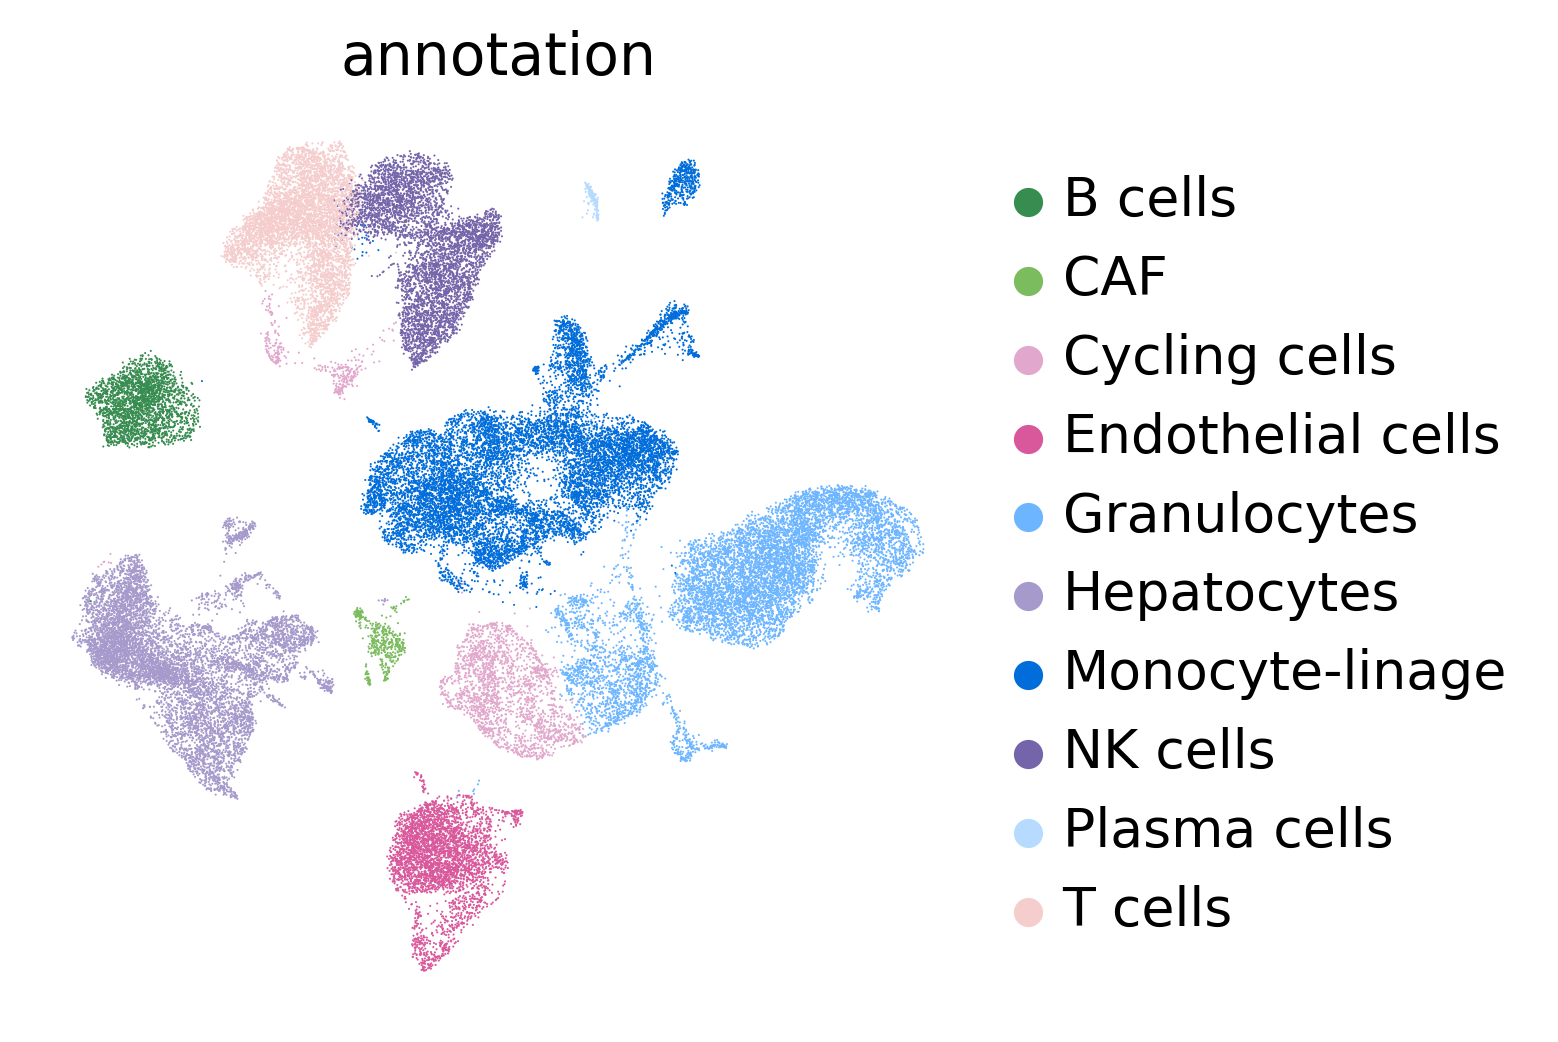

In [8]:
sc.pl.umap(adata, color = 'annotation', palette=palette_d, frameon=False, s=1, save='_landscape.pdf')

In [23]:
adata.write('sc_mice_annotation.h5ad')

In [3]:
adata = sc.read_h5ad("sc_mice_annotation.h5ad")

In [4]:
adata = adata[adata.obs.sample_id != "NT3"]

In [9]:
from pandas.api.types import CategoricalDtype

In [10]:
cell_type = CategoricalDtype(categories=["B cells", 
                                         "Plasma cells",
                                         "Endothelial cells",
                                         "Fibroblasts",
                                         "Hepatocytes",
                                         "Mono/macro",
                                         "Granulocytes",
                                         "NK cells",
                                         "T cells",
                                         "Cycling cells"], ordered=True)

In [11]:
adata.obs['annotation_dotplot'] = (
    adata.obs["annotation"]
    .map(lambda x: {"Monocyte-linage": "Mono/macro", "CAF": "Fibroblasts"}.get(x, x))
    .astype("category")
)

In [12]:
adata.obs["annotation_dotplot"] = adata.obs["annotation_dotplot"].astype(cell_type)

In [13]:
# Marker visualization
markers = {
    'B cells': ['Cd79a', 'Ms4a1'], 
    'Plasma cells': ['Jchain', 'Mzb1'],  
    'Endothelial cells': ['Ptprb', 'Maf'], 
    'Fibroblasts': ['Ecm1', 'Plvap'], 
    'Hepatocytes': ['Apob', 'Ttr'], 
    'Mono/macro': ['C1qb', 'Lyz2'], 
    'Granulocytes': ['Itgam', 'Mcl1'], 
    'NK cells': ['Xcl1', 'Klrk1'],  
    'T cells': ['Il7r', 'Cd3d'], 
    'Cycling cells': ['Mki67', 'Top2a'], 
}

/home/chutianhao/.conda/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


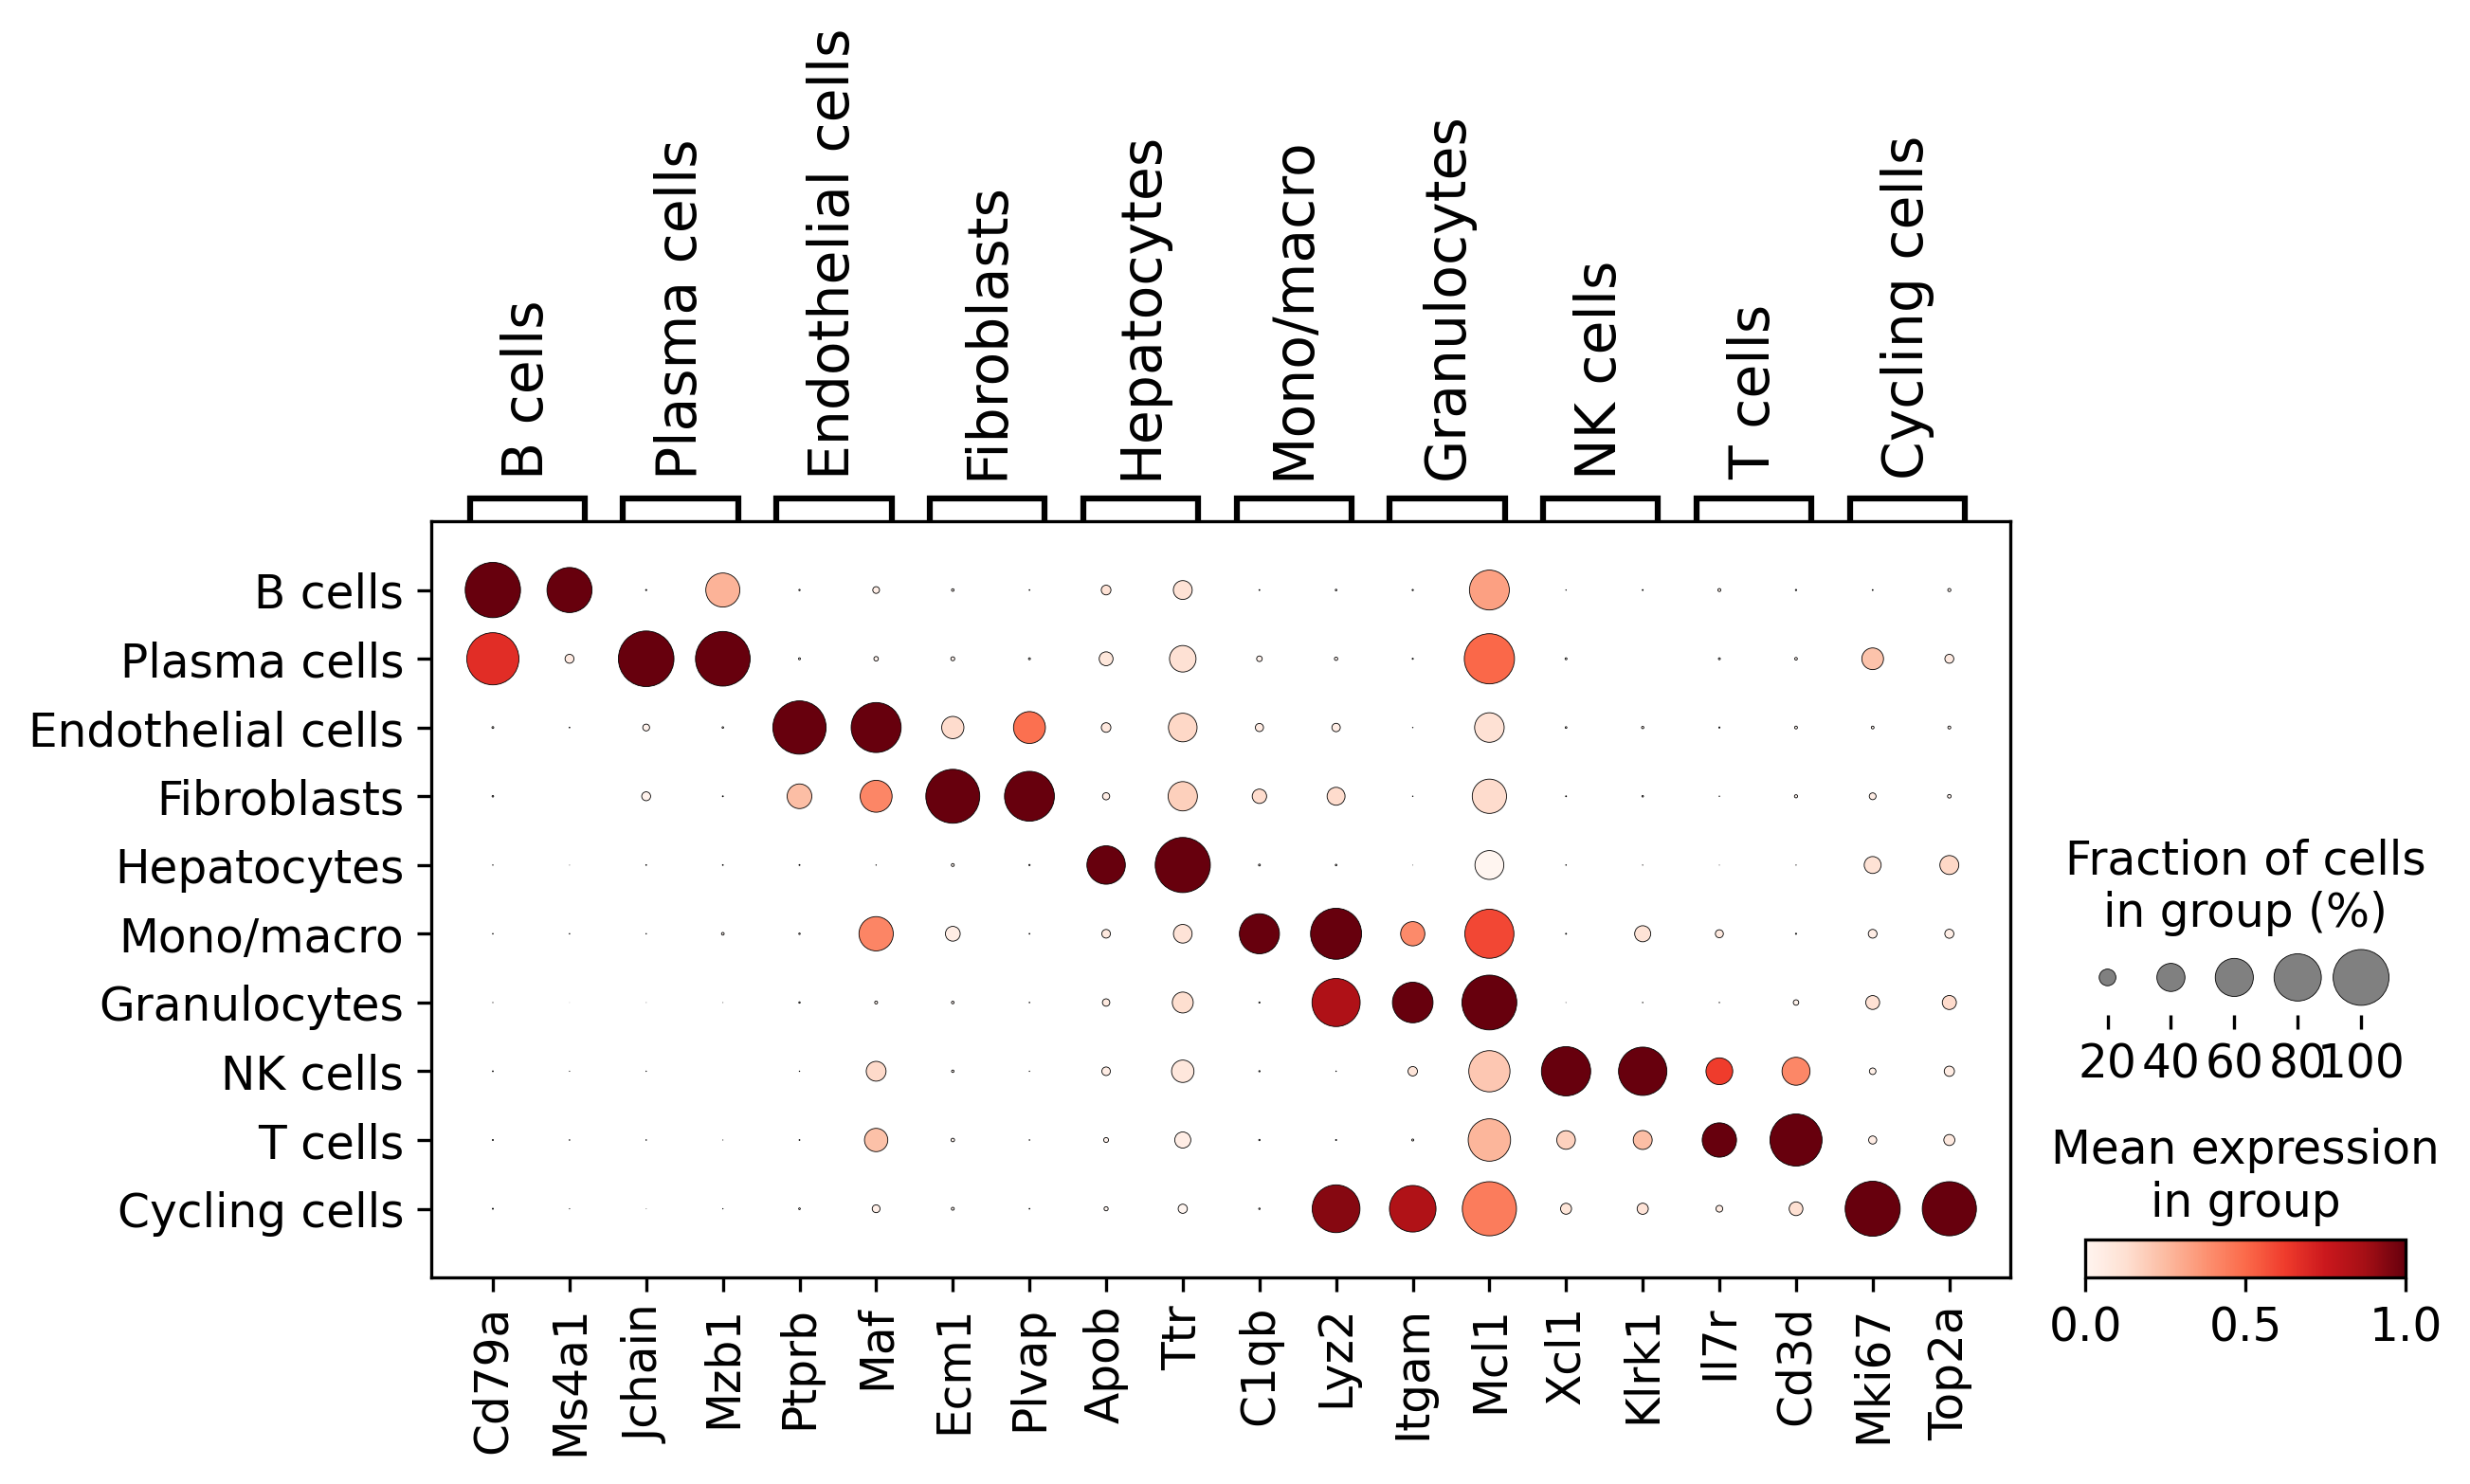

In [14]:
sc.pl.dotplot(adata, markers,'annotation_dotplot', color_map='Reds', standard_scale='var', save="marker_gene_dotplot.pdf")

In [58]:
adata = sc.read_h5ad('sc_mice_annotation.h5ad')

/home/chutianhao/.conda/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


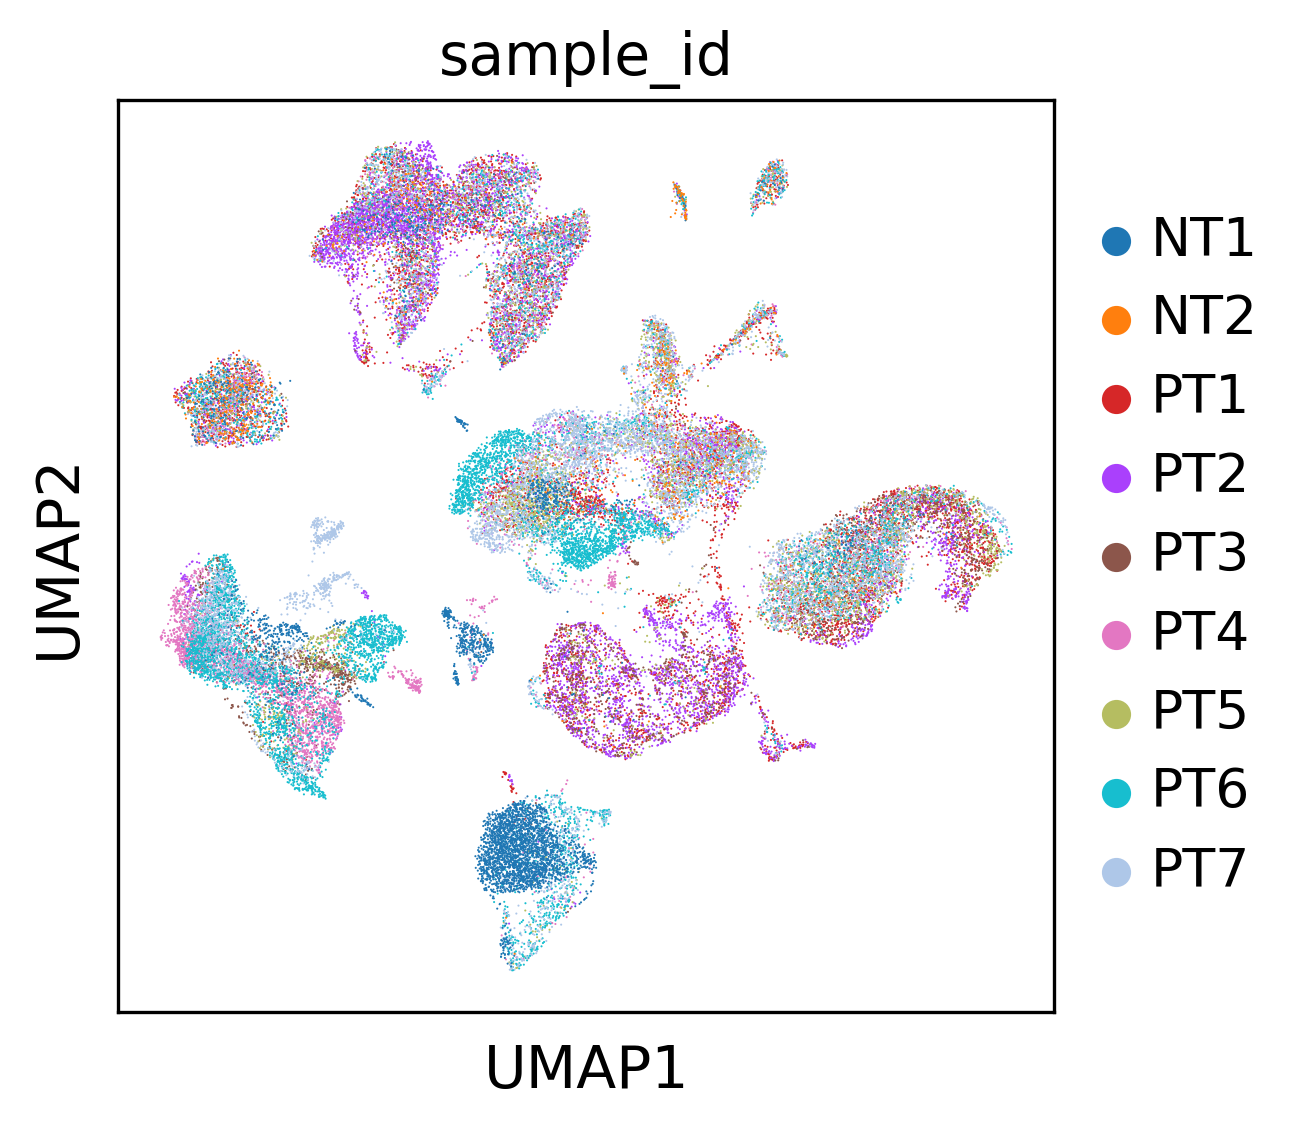

In [15]:
sc.pl.umap(adata, color="sample_id", s=1, save="_sample_id.pdf")

/home/chutianhao/.conda/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


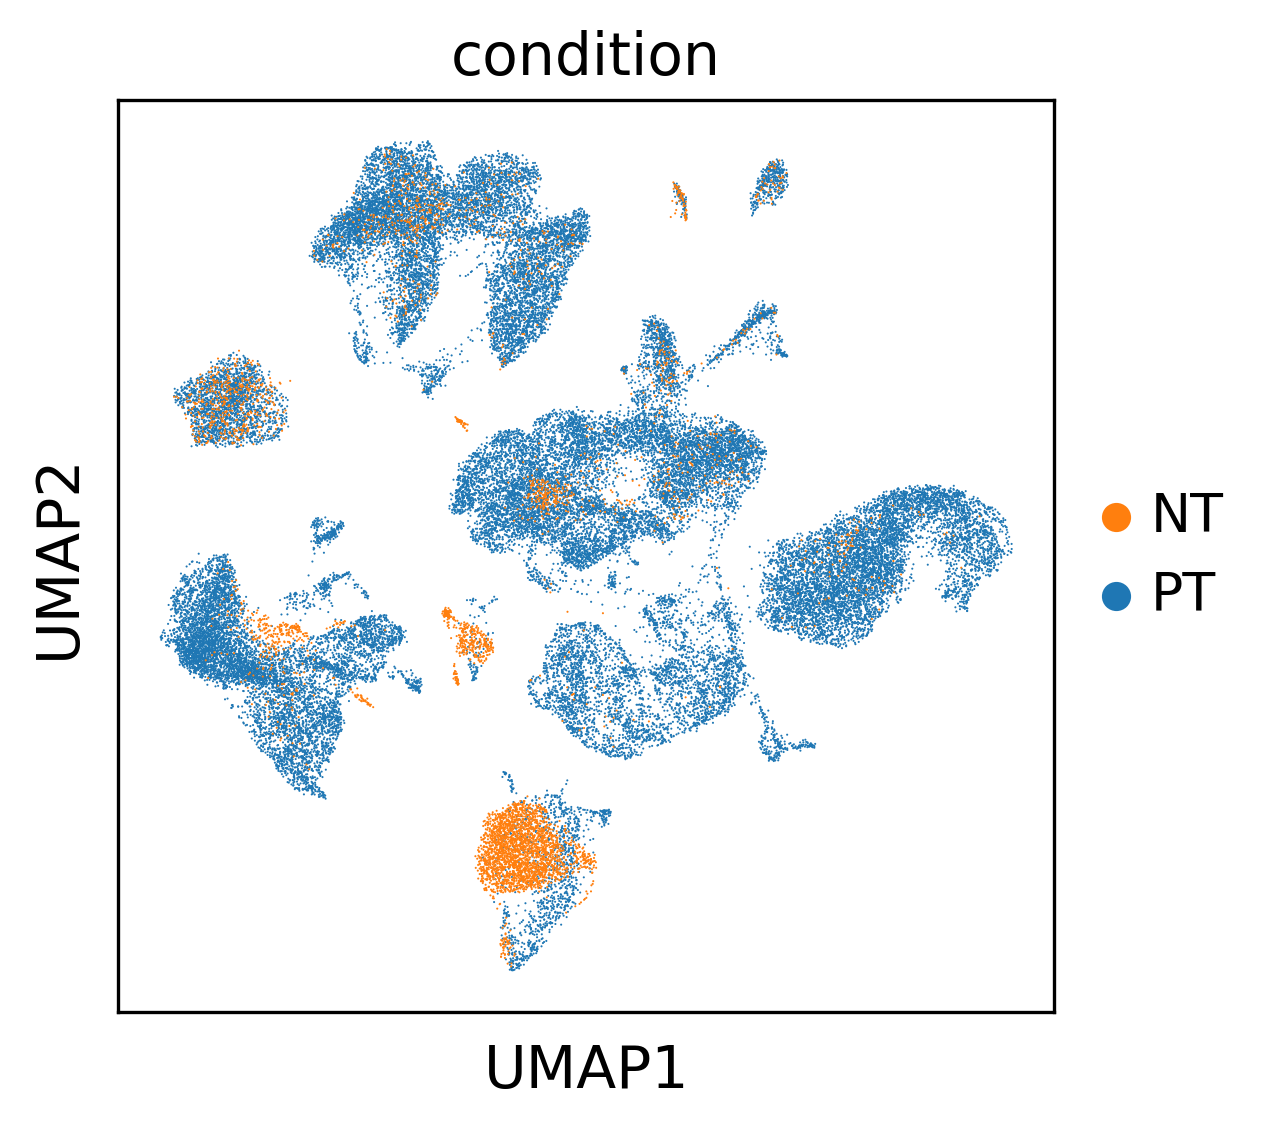

In [20]:
sc.pl.umap(adata, color="condition", s=1, palette=["#FF7F0E", "#1F77B4"], save="_condition.pdf")

In [ ]:
sc.pl.umap(
    adata,
    color=['sample_id', "annotation"],
    frameon=False
)

In [7]:
mat = adata.layers['counts'].copy()

In [9]:
adata.X = mat

In [10]:
print(adata.X)

  (9776, 0)	1.0
  (24635, 0)	1.0
  (50171, 0)	1.0
  (10623, 1)	1.0
  (35149, 1)	1.0
  (35302, 1)	1.0
  (35430, 1)	1.0
  (35573, 1)	1.0
  (37012, 1)	1.0
  (38203, 1)	2.0
  (39651, 1)	1.0
  (40539, 1)	1.0
  (2438, 2)	1.0
  (8554, 2)	1.0
  (10257, 2)	4.0
  (13346, 2)	2.0
  (13774, 2)	2.0
  (16876, 2)	9.0
  (17856, 2)	1.0
  (17920, 2)	2.0
  (17959, 2)	1.0
  (18193, 2)	3.0
  (18211, 2)	1.0
  (18263, 2)	7.0
  (18384, 2)	3.0
  :	:
  (52926, 16412)	1.0
  (52996, 16412)	1.0
  (53091, 16412)	1.0
  (53223, 16412)	1.0
  (53349, 16412)	1.0
  (53460, 16412)	1.0
  (53465, 16412)	1.0
  (53509, 16412)	1.0
  (53547, 16412)	2.0
  (53588, 16412)	1.0
  (53806, 16412)	1.0
  (53879, 16412)	1.0
  (54094, 16412)	1.0
  (54532, 16412)	1.0
  (54640, 16412)	1.0
  (54654, 16412)	1.0
  (54672, 16412)	1.0
  (54673, 16412)	1.0
  (54884, 16412)	1.0
  (55542, 16412)	1.0
  (55680, 16412)	1.0
  (55732, 16412)	1.0
  (55845, 16412)	1.0
  (56054, 16412)	1.0
  (56196, 16412)	1.0


In [11]:
adata.write('sc_mice_annotation.h5ad')

In [4]:
adata = sc.read_h5ad("sc_mice_annotation.h5ad")

In [5]:
adata

AnnData object with n_obs × n_vars = 56241 × 16413
    obs: 'sample_id', 'nCount_RNA', 'nFeature_RNA', 'mt_ratio', 'ribo_ratio', 'condition', 'RNA_snn_res.1', 'seurat_clusters', 'sc_leiden', 'annotation'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'RNA_snn_res.1_colors', 'annotation_colors', 'leiden', 'log1p', 'neighbors', 'rank_genes_groups', 'sample_id_colors', 'sc_leiden_colors', 'umap'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'